In [19]:
import random
import time
import importlib
import game
importlib.reload(game)
import gameEnvF 
importlib.reload(gameEnvF)
from game import ColorableCliqueGame
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from gameEnvF import draw, triangle_huristic, alphabetaMaxDepth, alphabetaMove, random_move, getPsuedoLegalStates, getLegalStatesAndTag
print(tf.__version__)

colors = [(255,100,100), (100,100,255)]
env = ColorableCliqueGame(300,300,6,colors)
#env.close()

2.8.0


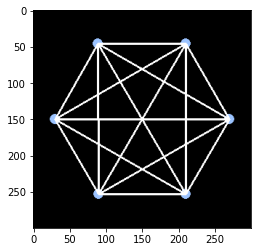

In [14]:
draw(env)

In [3]:
env = ColorableCliqueGame(300,300,6,colors)

[ 0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  1]
0.0


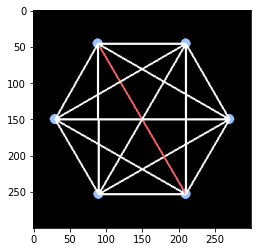

In [4]:
moves = env.getMoves()
random_move(env)
print(env.state1D())
print(alphabetaMaxDepth(env, -9999, 9999, 3, triangle_huristic))
draw(env)

(False, 0)
-1
0.0


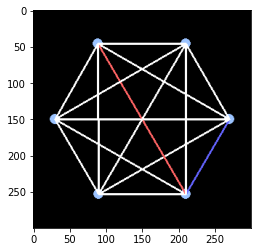

In [5]:
md = alphabetaMove(env, 3, triangle_huristic)
print(md)
print(env.winner)
print(alphabetaMaxDepth(env, -9999, 9999, 3, triangle_huristic))
draw(env)

1


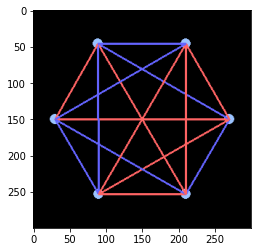

In [6]:
while(env.winner == -1):
    alphabetaMove(env,1, triangle_huristic)
print(env.winner)
draw(env)

In [7]:
#envt = ColorableCliqueGame(300,300,6,colors)
def test(test_num, random_moves, depth, huristic_func):
    player0Wins = 0
    player1Wins = 0
    for r in range(test_num):
        envt = ColorableCliqueGame(300,300,6,colors)
        for _ in range(random_moves):
            random_move(envt)
        #print(envt.winner)
        while(envt.winner == -1):
            #print(envt.player)
            alphabetaMove(envt, depth, huristic_func)
        #print(envt.winner)
        if envt.winner == 0:
            player0Wins += 1
        else:
            player1Wins += 1
        if r % 5 == 0:
            print("round ",r)
    print("player0 won :", player0Wins, "player1 won :", player1Wins)

In [43]:
test(10, 1, 5, triangle_huristic)

round  0
round  5
player0 won : 6 player1 won : 4


### Get all possible positions legal and illegal

In [8]:
from game import nCr

allp = getPsuedoLegalStates()
print("size : ", len(allp))

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
size :  14348907


### Sort the ilegal positions, and create the tag.

In [45]:
import importlib
import game
importlib.reload(game)
from game import ColorableCliqueGame

env = ColorableCliqueGame(300,300,6,colors)

In [20]:
X = getLegalStatesAndTag(allp, 3, triangle_huristic, log=250000)

250000
500000
750000
1000000
1250000
1500000
1750000
2000000
2250000
2500000
2750000
3000000
3250000
3500000
3750000
4000000
4250000
4500000
4750000
5000000
5250000
5500000
5750000
6000000
6250000
6500000
6750000
7000000
7250000
7500000
7750000
8000000
8250000
8500000
8750000
9000000
9250000
9500000
9750000
10000000
10250000
10500000
10750000
11000000
11250000
11500000
11750000
12000000
12250000
12500000
12750000
13000000
13250000
13500000
13750000
14000000
14250000


c:\MyDirectory\Programming\Machine Learning\Final\gameEnvF.py:308: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[ 1  1  1  1 -1  0  0 -1  0  0  0 -1  0 -1 -1 -1] -2.7805781249999995
True
-1.95
-1


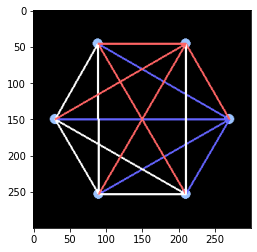

In [47]:
drawIndex = 43006
env = ColorableCliqueGame(300,300,6,colors)
print(X[drawIndex][0], X[drawIndex][1])
print(env.loadfrom1D(X[drawIndex][0]))
print(alphabetaMaxDepth(env, -9999, 9999, 1, triangle_huristic))
print(env.winner)
draw(env)

# [ 1  1  1  1  1 -1  0 -1  0  0  0 -1  0 -1 -1  1] -97.5
# True
# -97.5
# -1

In [16]:
# def save(X, name, maxSize):
#     folds = int(X.shape[0] / maxSize)
#     for i in range(folds):
#         sn = name + "_p" + i + ".npy"
#         with open(sn, 'wb') as f:
#             np.save(f, X[i * maxSize: (i+1) * maxSize])
#save(X, "K6D3", 10000)
#import gzip

filename = 'data\K6D3n.npz'
with open(filename, 'wb') as f:
    np.savez_compressed(f, data=X)
    #f.close()
#np.savez_compressed('/tmp/123', a=X)

In [17]:
with open(filename, 'rb') as f:
    a = np.load(f, allow_pickle=True)
    data = a['data']

In [18]:
print(data[0])
print(X[0])

[array([ 1,  1,  1,  1,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1],
       dtype=int64)
 -100]
[array([ 1,  1,  1,  1,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1],
       dtype=int64)
 -100]
